# Import Necessary Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv("C:/Users/aastha/Downloads/mini/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40


# Missing Values Treatment

In [3]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                       float64
Annual Income               int64
Spending Score (1-100)      int64
dtype: object

In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     196 non-null    float64
 3   Annual Income           200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [7]:
#finding duplicates
df.duplicated().sum()

0

In [8]:
df.isnull()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,False,False,False,False,False
1,False,False,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
#finding missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       4
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.isnull().sum().sum()

4

# Filling Null Values

In [11]:
df1 = df.fillna(value = 0)
df1

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,0.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40
...,...,...,...,...,...
195,196,Female,35.0,120,79
196,197,Female,45.0,126,28
197,198,Male,32.0,126,74
198,199,Male,32.0,137,18


In [12]:
df1.isnull().sum().sum()

0

# Outlier Detection and Removal Treatment

In [13]:
columns_to_analyze = ['Age', 'Annual Income', 'Spending Score (1-100)']

# Function to detect and remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        
#       Calculating the first quartile (Q1) and third quartile (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
#       Computing the IQR
        IQR = Q3 - Q1
    
#       Defining the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
#       Filtering the DataFrame to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df1_cleaned = remove_outliers(df1, columns_to_analyze)

print(df1_cleaned.head())

   CustomerID  Gender   Age  Annual Income  Spending Score (1-100)
0           1    Male  19.0             15                      39
1           2    Male   0.0             15                      81
2           3  Female  20.0             16                       6
3           4  Female  23.0             16                      77
4           5  Female  31.0             17                      40


# Normalization

In [14]:
scaler = MinMaxScaler()
df1_cleaned[columns_to_analyze] = scaler.fit_transform(df1_cleaned[columns_to_analyze])
print(df1_cleaned.head())

   CustomerID  Gender       Age  Annual Income  Spending Score (1-100)
0           1    Male  0.271429       0.000000                0.387755
1           2    Male  0.000000       0.000000                0.816327
2           3  Female  0.285714       0.009009                0.051020
3           4  Female  0.328571       0.009009                0.775510
4           5  Female  0.442857       0.018018                0.397959


# Elbow Method

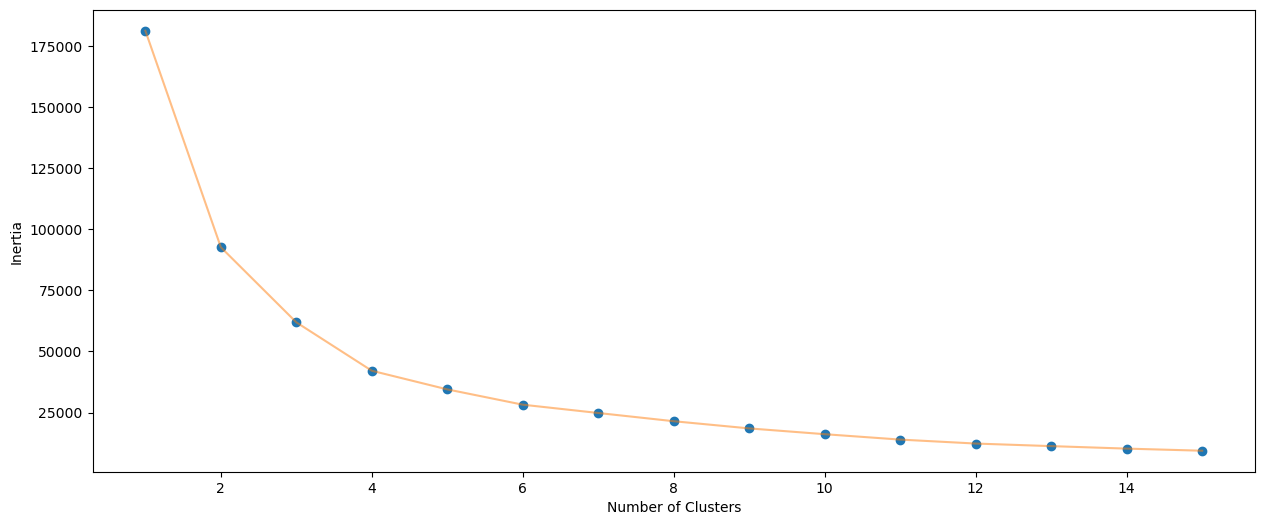

In [15]:
# Extract the relevant columns
X1 = df1[['Age', 'Annual Income']].values

# Initialize an empty list to store inertia values
inertia = []

# Determine the range dynamically from the length of the data or any other criteria
max_clusters = min(len(df1), 15)  # Set the maximum number of clusters to 15 or the length of data, whichever is smaller

# Loop over the range of cluster values
for n in range(1, max_clusters + 1):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

# Plot the inertia values
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, max_clusters + 1), inertia, 'o')
plt.plot(np.arange(1, max_clusters + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Implementation Of K-Mean

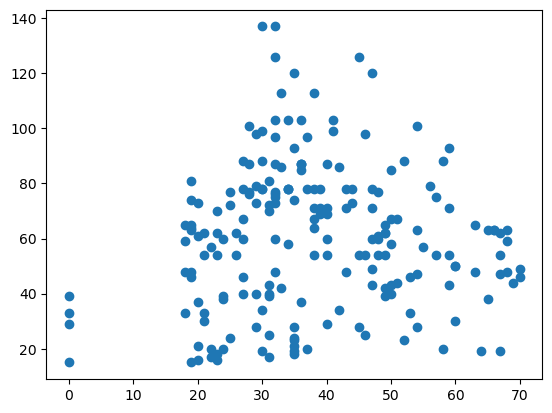

In [16]:
plt.scatter(df1['Age'], df1['Annual Income'])


In [17]:


# Define an imputer to fill in the missing values
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the columns
df[['Age', 'Annual Income']] = imputer.fit_transform(df[['Age', 'Annual Income']])

# Apply KMeans
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age', 'Annual Income']])
print(y_predicted)

[1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1
 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 0 2 2 0 2 2 2 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [18]:
km.cluster_centers_

array([[ 31.95890411,  72.95890411],
       [ 30.99387755,  29.46      ],
       [ 55.96226415,  52.01886792],
       [ 39.        , 106.5       ]])

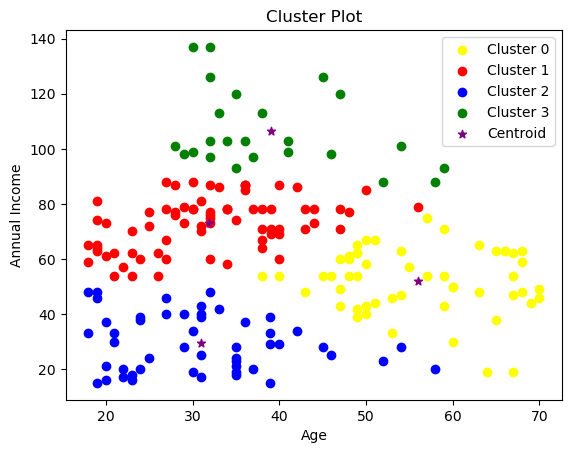

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform clustering
km = KMeans(n_clusters=4)
df['cluster'] = km.fit_predict(df[['Age', 'Annual Income']])

# Create data subsets
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

# Plot clusters
plt.scatter(df1['Age'], df1['Annual Income'], color='yellow', label='Cluster 0')
plt.scatter(df2['Age'], df2['Annual Income'], color='red', label='Cluster 1')
plt.scatter(df3['Age'], df3['Annual Income'], color='blue', label='Cluster 2')
plt.scatter(df4['Age'], df4['Annual Income'], color='green', label='Cluster 3')

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')

# Show plot
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Cluster Plot')
plt.legend()
plt.show()


# Evaluating the Effectiveness of K-means Clustering

In [20]:
# Calculate Sum of Squared Errors (SSE)

sse = 0
for i in range(len(df)):
    centroid = km.cluster_centers_[df.loc[i, 'cluster']]
    sse += np.sum((df.loc[i, ['Age', 'Annual Income']] - centroid) ** 2)

print(f"Sum of Squared Errors (SSE): {sse}")

Sum of Squared Errors (SSE): 39178.202679370595


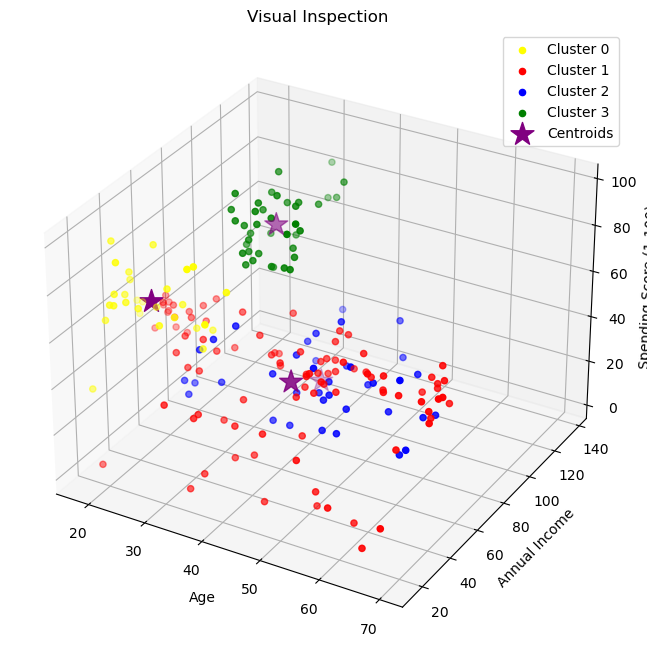

In [22]:
# Visual Inspection

# Perform clustering
km = KMeans(n_clusters=4)
df['cluster'] = km.fit_predict(df[['Age', 'Annual Income', 'Spending Score (1-100)']])

# Create data subsets
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

# Plot 3D scatter plot with first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points colored by clusters
ax.scatter(df1['Age'], df1['Annual Income'], df1['Spending Score (1-100)'], color='yellow', label='Cluster 0')
ax.scatter(df2['Age'], df2['Annual Income'], df2['Spending Score (1-100)'], color='red', label='Cluster 1')
ax.scatter(df3['Age'], df3['Annual Income'], df3['Spending Score (1-100)'], color='blue', label='Cluster 2')
ax.scatter(df4['Age'], df4['Annual Income'], df4['Spending Score (1-100)'], color='green', label='Cluster 3')

# Plot centroids
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], 
           color='purple', marker='*', s=300, label='Centroids')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Visual Inspection')
plt.legend()
plt.grid(False)
plt.show()
